[View in Colaboratory](https://colab.research.google.com/github/kmanicka/CarND-Advanced-Lane-Lines/blob/master/CarND_Advanced_Lane_Lines.ipynb)

In [8]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is 20FE-2CA3

 Directory of C:\Users\kmanickavelu\workspace\udacity1\03_Advanced_Lane_Finding\CarND-Advanced-Lane-Lines

05/29/2018  10:40 PM    <DIR>          .
05/29/2018  10:40 PM    <DIR>          ..
05/29/2018  10:38 PM    <DIR>          .ipynb_checkpoints
05/29/2018  09:38 PM    <DIR>          camera_cal
05/29/2018  10:40 PM             3,105 CarND_Advanced_Lane_Lines.ipynb
05/29/2018  09:38 PM         8,137,129 challenge_video.mp4
05/29/2018  09:38 PM    <DIR>          examples
05/29/2018  09:38 PM           921,091 example_writeup.pdf
05/29/2018  09:38 PM        24,206,640 harder_challenge_video.mp4
05/29/2018  09:38 PM             1,096 LICENSE
05/29/2018  09:38 PM    <DIR>          output_images
05/29/2018  09:38 PM        25,268,015 project_video.mp4
05/29/2018  09:38 PM             3,465 README.md
05/29/2018  09:38 PM    <DIR>          test_images
05/29/2018  09:38 PM             6,923 writeup_template.md
               8 F

In [30]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

class Calibration : 

    def __init__(self, chess_board_corners):
        self.chess_board_corners = chess_board_corners
        
    def calibrate_camera(self, calibration_image_list_pattern,verbose=0) :    
        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        objp = np.zeros((6*9,3), np.float32)
        objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

        # Arrays to store object points and image points from all the images.
        objpoints = [] # 3d points in real world space
        imgpoints = [] # 2d points in image plane.

        # Make a list of calibration images
        images = glob.glob(calibration_image_list_pattern)

        # Step through the list and search for chessboard corners
        for fname in images:

            if verbose == 1:
                print('processing file ' + fname)
            
            img = cv2.imread(fname)

            if verbose == 1:
                fig=plt.figure(figsize=(10, 10))
                fig.add_subplot(2, 2, 1)
                plt.imshow(img)

            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, self.chess_board_corners,None)

            # If found, add object points, image points
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(corners)

                if verbose == 1:
                    # Draw and display the corners
                    img1 = cv2.drawChessboardCorners(img, self.chess_board_corners, corners, ret)
                    fig.add_subplot(2, 2, 2)
                    plt.imshow(img1)

            if verbose == 1 :
                plt.show()

        image = cv2.imread(images[0])
        image_size = (image.shape[1], image.shape[0])
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size,None,None)
        
        self.camera_metrix = mtx
        self.dist = dist
        
        return self.camera_metrix, self.dist
    
    def undistort(self,image_path,verbose=0) :
        image = cv2.imread(image_path)
        undistort = cv2.undistort(image, self.camera_metrix, self.dist, None, self.camera_metrix)
        
        if verbose==1:
            fig=plt.figure(figsize=(10, 10))
            fig.add_subplot(2, 2, 1)
            plt.imshow(image)
            fig.add_subplot(2, 2, 2)
            plt.imshow(undistort)

        return undistort
        

processing file camera_cal\calibration1.jpg


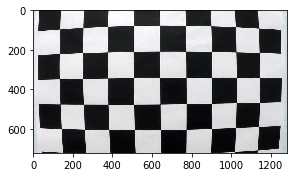

processing file camera_cal\calibration10.jpg


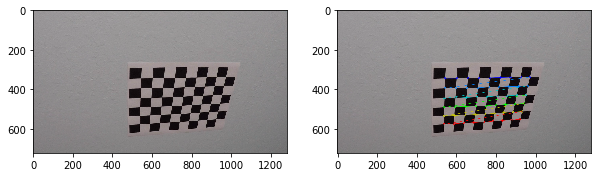

processing file camera_cal\calibration11.jpg


In [ ]:
calibrate = Calibration((9,6))
mtx,dist = calibrate.calibrate_camera('camera_cal/calibration*.jpg',1)